In [2]:
print('22 paskaita')

22 paskaita


In [16]:
# Terminale įvykdau komandą:
# /bin/python3 -m pip install mysql-connector-python=8.0.29 --break-system-packages

In [1]:
### Įvykdyti iš anksto! ###

import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore')
# import seaborn as sns
# import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [4]:
### PRIVALOMA ĮVYKDYTI! ###

def pout(a, limit=5):
    if len(a) > limit:
        print(f'Rodoma {limit} eilutės iš {len(a)}')
    for k,i in enumerate(a):
        if k > limit-1:
            break
        l = []
        for n in i:
            f = f'{str(n):^16.16}'
            l.append(f)
        t = f'|{k:^3}|'+'|'.join(l)+'|'
        print(t)

In [6]:
### PRIVALOMA ĮVYKDYTI! ###

#prisijungimas prie mySQL, ir kursoriaus sukūrimas

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
    )
C=DB.cursor()

In [20]:
#sql užklausos vykdymo per mysql/mariadb kursorių schema:

sql="""paste SQL command here!"""
C.execute(sql)
ans = C.fetchall()
pout(ans)
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [12]:
#sql užklausos vykdymas per mysql/mariadb kursorių

sql="""select *, C/(select count(*) from sa)*100 as '%' from
(select * from
(select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T1
union all
select 'Others', count(*) as C
from sa
where device_brand not in
(select B from (select device_brand as B, count(*) as C
from sa
where device_brand != ''
group by device_brand
order by C desc
limit 5) as T2)) as T3;"""

C.execute(sql)
ans = C.fetchall()

gamintojai, kiekiai, dalis = list(map(list, zip(*ans)))

pout(ans)

Rodoma 5 eilutės iš 6
| 0 |    Samsung     |     36290      |    30.4927     |
| 1 |     Nokia      |     35186      |    29.5651     |
| 2 |   BlackBerry   |      7161      |     6.0170     |
| 3 |       LG       |      5194      |     4.3643     |
| 4 |  SonyEricsson  |      4090      |     3.4366     |


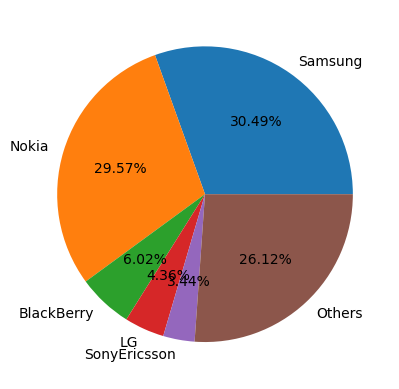

In [13]:
fig, axis = plt.subplots()
axis.pie(kiekiai, labels=gamintojai, autopct='%.2f%%')
plt.show()

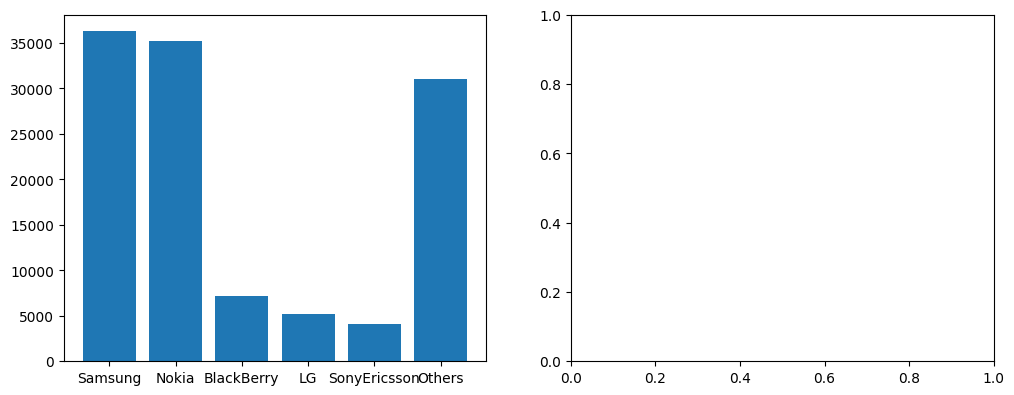

In [15]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)

plt.show()

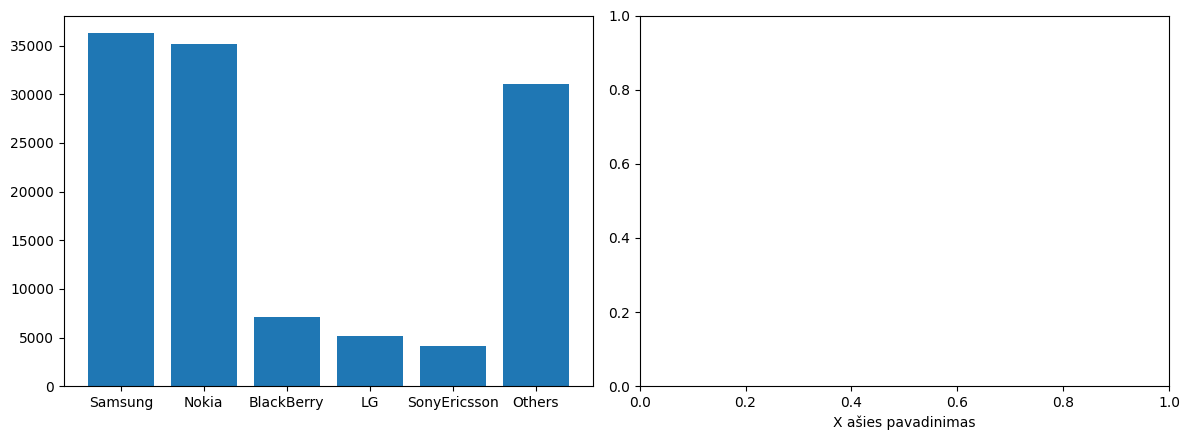

In [17]:
# Kiek respondentų dalyvavo apklausoje 2014 bei 2018 metais iš kiekvienos amžiaus grupės?

fig, axes = plt.subplots(1,2, figsize=[12,4.5])
axes[0].bar(gamintojai, kiekiai)
axes[1].set_xlabel('X ašies pavadinimas')
fig.tight_layout()
plt.show()

In [18]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14 as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
group by A),
D18 as
(select amzius, count(*)
from DUS2018N
group by amzius)
select * from D14 join D18 on D14.A = D18.amzius;"""
C.execute(sql)
ans = C.fetchall()
gr, C14, gr_, C18 = list(map(list, zip(*ans)))
pout(ans)
#? = np.transpose(ans)

| 0 |     14-29      |      9362      |     14-29      |      9368      |
| 1 |     30-39      |      9747      |     30-39      |      9282      |
| 2 |     40-49      |     10947      |     40-49      |      9421      |
| 3 |     50-59      |     10968      |     50-59      |     10056      |
| 4 |      60+       |      3928      |      60+       |      5037      |


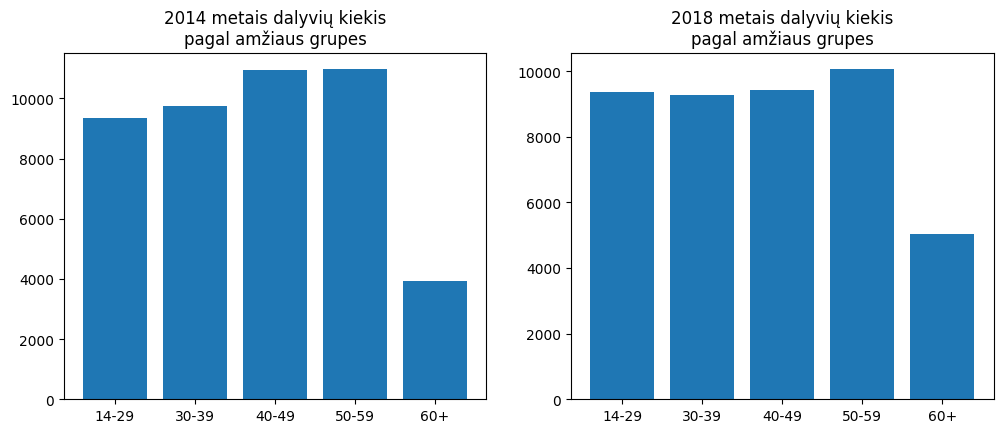

In [19]:
fig, axes = plt.subplots(1,2, figsize=[12,4.5])

axes[0].bar(gr, C14)
axes[1].bar(gr_, C18)
axes[0].set_title('2014 metais dalyvių kiekis\npagal amžiaus grupes')
axes[1].set_title('2018 metais dalyvių kiekis\npagal amžiaus grupes')
plt.show()

In [16]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D14f as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'F'
group by A),
D14m as
(select case
when amzius in ('14-19', '20-29') then '14-29'
else amzius
end as A, count(*)
from DUS2014N
where lytis = 'M'
group by A)
select * from D14f join D14m using (A);"""
C.execute(sql)
ans = C.fetchall()
gr, D14f, D14m = list(map(list, zip(*ans)))
#? = np.transpose(ans)

print('| Nr. | Gr. | D 14 f | D 14 m |')
pout(ans)

| Nr. | Gr. | D 14 f | D 14 m |
| 0 |     14-29      |      4080      |      5282      |
| 1 |     30-39      |      4551      |      5196      |
| 2 |     40-49      |      5879      |      5068      |
| 3 |     50-59      |      5956      |      5012      |
| 4 |      60+       |      1900      |      2028      |


In [17]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with D18f as
(select amzius, count(*)
from DUS2018N
where lytis = 'F'
group by amzius),
D18m as
(select amzius, count(*)
from DUS2018N
where lytis = 'M'
group by amzius)
select * from D18f join D18m using (amzius);"""
C.execute(sql)
ans = C.fetchall()
gr, D18f, D18m = list(map(list, zip(*ans)))
#? = np.transpose(ans)

print('| Nr. | Gr. | D 18 f | D 18 m |')
pout(ans)

| Nr. | Gr. | D 18 f | D 18 m |
| 0 |     14-29      |      4291      |      5077      |
| 1 |     30-39      |      4118      |      5164      |
| 2 |     40-49      |      4670      |      4751      |
| 3 |     50-59      |      5186      |      4870      |
| 4 |      60+       |      2423      |      2614      |


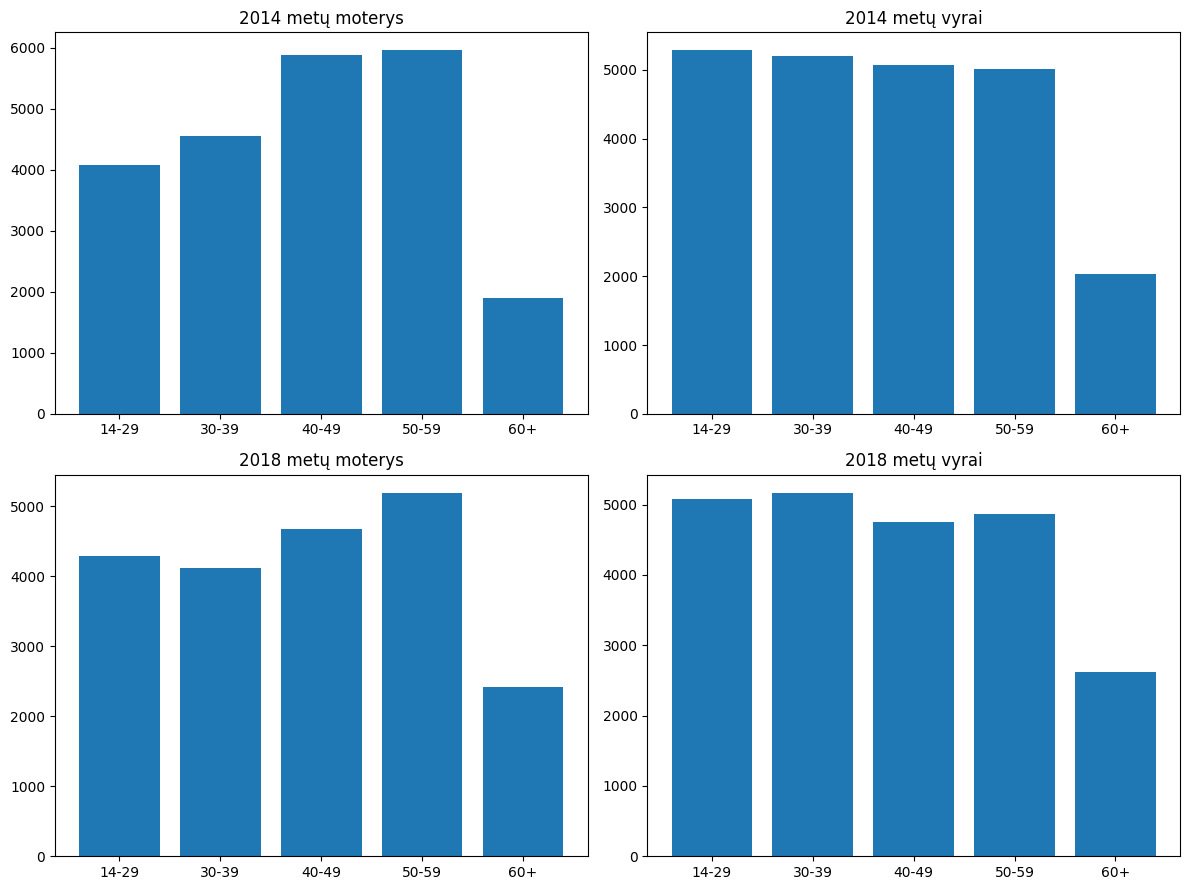

In [18]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,9), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})

ax1.bar(gr, D14f)
ax1.set_title('2014 metų moterys')
ax2.bar(gr, D14m)
ax2.set_title('2014 metų vyrai')
ax3.bar(gr, D18f)
ax3.set_title('2018 metų moterys')
ax4.bar(gr, D18m)
ax4.set_title('2018 metų vyrai')

fig.tight_layout()
plt.show()

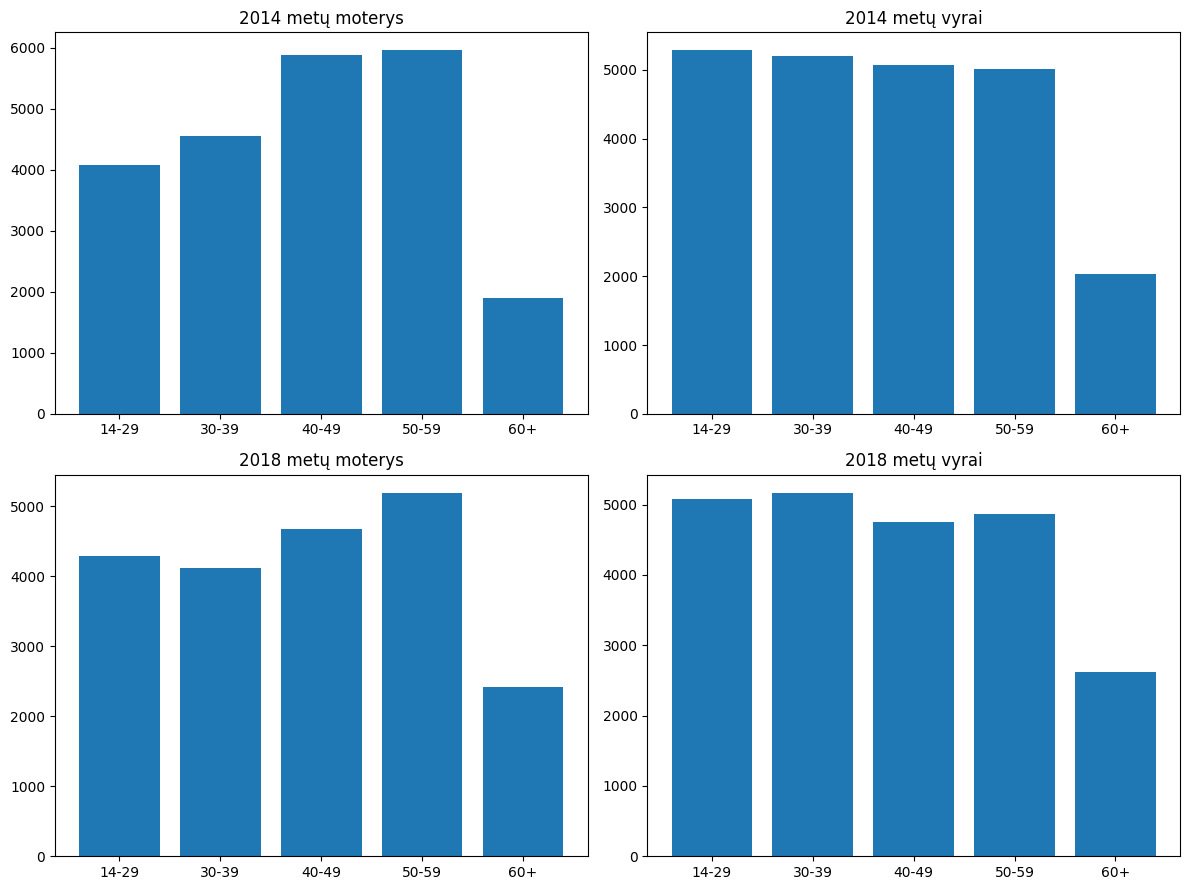

In [19]:
# 2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę nuo amžiaus grupės, atskirai vyrams, atskirai moterims.

fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(12,9), gridspec_kw={'width_ratios':[1,1], 'height_ratios':[1,1]})

ax1.bar(gr, D14f)
ax1.set_title('2014 metų moterys')
ax2.bar(gr, D14m)
ax2.set_title('2014 metų vyrai')
ax3.bar(gr, D18f)
ax3.set_title('2018 metų moterys')
ax4.bar(gr, D18m)
ax4.set_title('2018 metų vyrai')

fig.tight_layout()
plt.show()

In [20]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""with A as 
(select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'F'
group by amzius),
B as
(
select amzius, avg(bdu_spalio)
from DUS2018N
where lytis = 'M'
group by amzius
)
select * from A join B using (amzius);"""
C.execute(sql)
ans = C.fetchall()
amzius, mot, vyr = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

| 0 |     14-29      |    777.5348    |    939.9636    |
| 1 |     30-39      |    971.0401    |   1182.9868    |
| 2 |     40-49      |    887.6261    |   1072.4953    |
| 3 |     50-59      |    777.8344    |    939.3762    |
| 4 |      60+       |    702.1246    |    860.9380    |


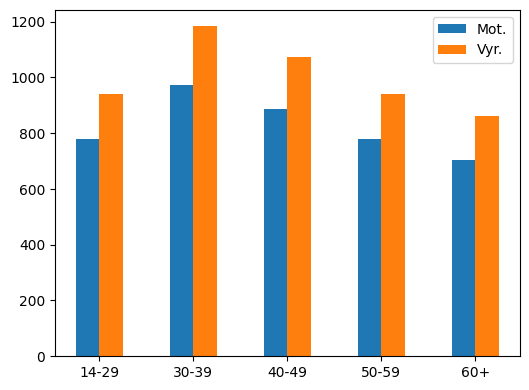

In [22]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(amzius))
w = 0.25
axis.bar(x-w/2,mot, label='Mot.', width=w)
axis.bar(x+w/2, vyr, label='Vyr.', width=w)

axis.set_xticks(x)
axis.set_xticklabels(amzius)

axis.legend(loc='best')
plt.show()

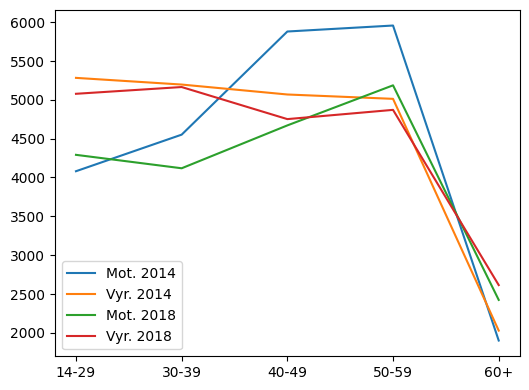

In [26]:
fig, axis = plt.subplots(figsize=[6,4.5])

x = np.arange(0,len(gr))

axis.plot( x, D14f, label='Mot. 2014' )
axis.plot( x, D14m, label='Vyr. 2014' )
axis.plot( x, D18f, label='Mot. 2018' )
axis.plot( x, D18m, label='Vyr. 2018' )

axis.set_xticks(x)
axis.set_xticklabels(amzius)

axis.legend(loc='best')
plt.show()

In [40]:
# Autoplius analizė.
import numpy as np
import matplotlib.pyplot as plt

#- Raskite 5-kis populiariausius autopliuslt skelbimuose esančius gamintojus, 
#- suraskite, kokia buvo kiekvienam iš šių gamintojų automobilių 
# vidutinė kaina, rida, automobilių amžius. (viena kompleksinė SQL užklausa)
#- vizualizuokite šią informaciją stulpeline ar kitokia diagrama

#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""sselect 
	count(*) as kiek, 
	avg(price) as kaina,
	avg(rida) as ridada,
	avg(pagaminimo_data) as data,
	gamintojas from autopliuslt a 
where NOT rida LIKE 'Nenurodyta'
group by gamintojas
order by kiek desc
limit 5;"""

C.execute(sql)
# ans = C.fetchall()
# kiek, kaina, data, rida, gamintojas = list(map(list,zip(*ans)))
# pout(ans)

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MariaDB server version for the right syntax to use near 'sselect 
	count(*) as kiek, 
	avg(price) as kaina,
	avg(rida) as ridada,
	avg...' at line 1

In [ ]:

mėn3R=['Sau','Vas','Kov','Bal','Geg','Bir','Lie','Rgp','Rgs','Spa','Lap','Gru']
vidMėnT=[-3.2,-3.2,0.4,6.7,12.4,15.4,17.9,17.1,12.3,7.2,1.9,-1.9]
spalva = ['blue' if t < 0 else 'green' for t in vidMėnT]

fig, axis = plt.subplots()

p = axis.barh(gamintojas,vidMėnT,color=cyan)
axis.bar_label(p)

# axis.plot(a-1,b, marker='o', ms=12, c='red')
axis.grid()
plt.show()

In [ ]:
# -- Sugrupuokite automobilius pagal jų amžių, ir suraskite
# -- vidutinę kainą kiekvienam amžiui.
# -- Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.
# -- Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# -- kiekviename intervale. Apvalinimas turi būti į
# -- didesnę pusę: 500 km turi tapti 5000 km.
# -- Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.